In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [37]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Convert to a DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [7]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
wine_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [12]:
wine_data['target'].unique()

array([0, 1, 2])

In [15]:
wine_data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [17]:
X=wine_data.drop('target',axis=1)
y=wine_data['target']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca=PCA(n_components=3)

In [26]:
X_pca=pca.fit_transform(X_train,y_train)

In [28]:
pca.components_

array([[ 1.77738063e-03, -8.13532033e-04,  1.41672133e-04,
        -5.43218358e-03,  1.96719103e-02,  1.04099788e-03,
         1.54504422e-03, -1.15638097e-04,  6.52261761e-04,
         2.26846944e-03,  1.61421529e-04,  7.81011292e-04,
         9.99784964e-01],
       [-1.24757937e-03, -2.18892204e-03,  4.26789890e-03,
         2.92447371e-02,  9.99268704e-01,  2.10452658e-03,
         1.58938501e-03, -1.71922512e-03,  5.06144001e-03,
         1.28363411e-02, -1.05266391e-05, -3.54662715e-04,
        -1.95400181e-02],
       [ 8.50004606e-04, -9.17970834e-02, -5.28999282e-02,
        -9.69817624e-01,  3.04113419e-02,  3.71475189e-02,
         6.78900093e-02, -1.42725856e-02,  3.20738945e-02,
        -1.92179612e-01,  1.90704023e-02,  5.24630220e-02,
        -5.71063435e-03]])

In [25]:
pca.explained_variance_ratio_

array([9.97776340e-01, 2.04102621e-03, 1.01662472e-04])

ValueError: 'c' argument has 178 elements, which is inconsistent with 'x' and 'y' with size 119.

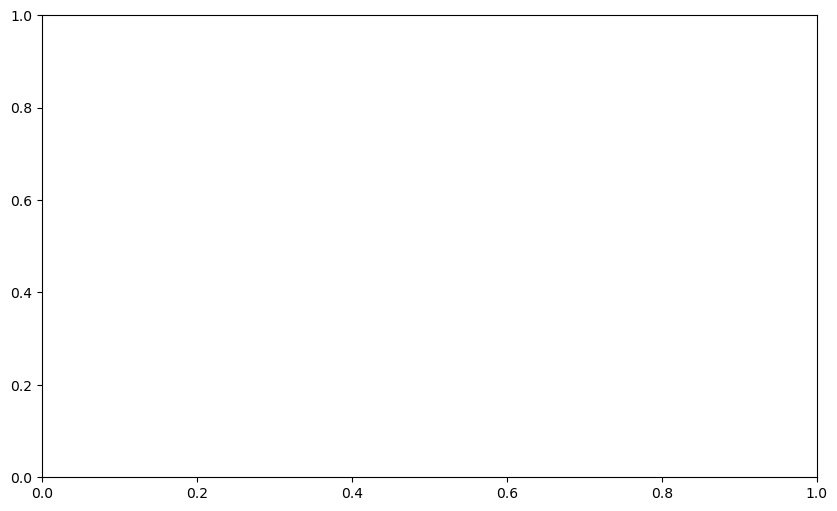

In [31]:
# Plot PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='target')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [33]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Convert to a DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


X_pca shape: (178, 2)
y shape: (178,)
Clusters shape: (178,)


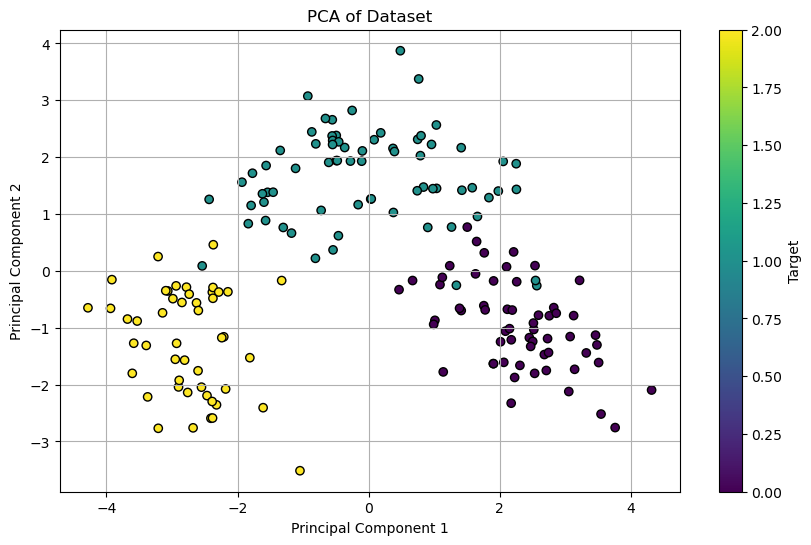

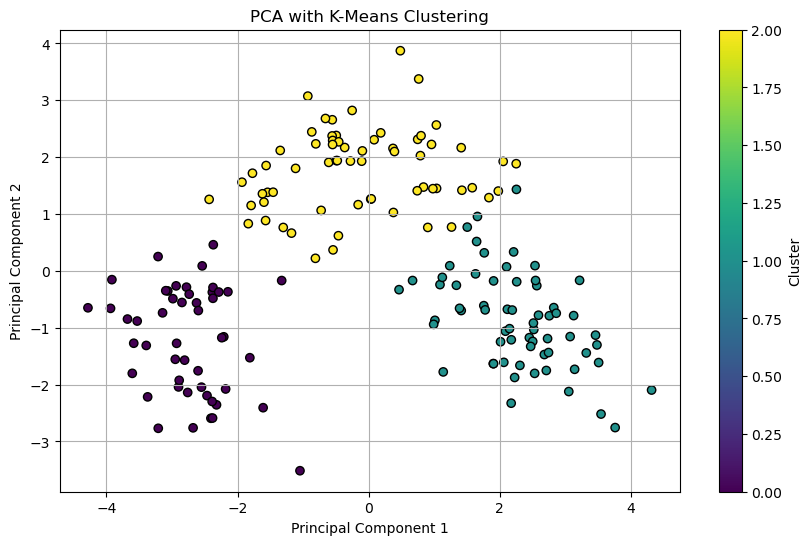

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sample DataFrame (Replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Example: df = pd.read_csv('wine_data.csv')
# Assume 'target' is the column with labels
X = df.drop(columns='target')  # Feature matrix
y = df['target']  # Target variable

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Check the shapes
print(f"X_pca shape: {X_pca.shape}")
print(f"y shape: {y.shape}")
print(f"Clusters shape: {clusters.shape}")

# Plot PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Target')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Plot PCA results with K-Means clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title('PCA with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
